dataset; https://www.kaggle.com/fedesoriano/stroke-prediction-dataset 


In [ ]:
#importing phyton liblibraries 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

In [ ]:
#importing dataset and printing the head

data=pd.read_csv("stroke_data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.shape

(5110, 12)

In [ ]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
#For the algorithms to understand the data, all string data types will be changed to categorical integer
#crossvalidation_df_newc['DIAG']=crossvalidation_df_newc['DIAG'].replace(['B','M'],['0','1'])
data ['gender'] = data ['gender'].replace (['Female', 'Male', 'Other'], ['0', '1','2'])
data ['ever_married'] = data ['ever_married'].replace(['Yes', 'No'], ['0', '1'])
data ['work_type'] = data ['work_type'].replace(['Self-employed', 'Private', 'Govt_job', 'children', 'Never_worked'], ['0','1','2','3','4'])
data ['Residence_type'] = data ['Residence_type'].replace(['Rural', 'Urban'], ['0', '1'])
data ['smoking_status'] = data ['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'], ['0', '1', '2', '3'])

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,0,1,1,228.69,36.6,0,1
1,51676,0,61.0,0,0,0,0,0,202.21,NaN,1,1
2,31112,1,80.0,0,1,0,1,0,105.92,32.5,1,1
3,60182,0,49.0,0,0,0,1,1,171.23,34.4,2,1
4,1665,0,79.0,1,0,0,0,0,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,0,1,1,83.75,NaN,1,0
5106,44873,0,81.0,0,0,0,0,1,125.20,40.0,1,0
5107,19723,0,35.0,0,0,0,0,0,82.99,30.6,1,0
5108,37544,1,51.0,0,0,0,1,0,166.29,25.6,0,0


In [ ]:
#checking data for missing values 
count_nan=data.isnull().sum()
print(count_nan[count_nan>0])

bmi    201
dtype: int64


In [ ]:
#dropping missing values 
ndata=data.dropna()


In [ ]:
ndata

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,0,1,1,228.69,36.6,0,1
2,31112,1,80.0,0,1,0,1,0,105.92,32.5,1,1
3,60182,0,49.0,0,0,0,1,1,171.23,34.4,2,1
4,1665,0,79.0,1,0,0,0,0,174.12,24.0,1,1
5,56669,1,81.0,0,0,0,1,1,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,1,3,0,103.08,18.6,3,0
5106,44873,0,81.0,0,0,0,0,1,125.20,40.0,1,0
5107,19723,0,35.0,0,0,0,0,0,82.99,30.6,1,0
5108,37544,1,51.0,0,0,0,1,0,166.29,25.6,0,0


In [ ]:
#checking the dataset for duplicated values
count_dup=ndata.duplicated().sum()
print(count_dup[count_dup>0])

[]


**DATA VISUAVISUALIZATION** 


The next step is to visualize the data using graphs

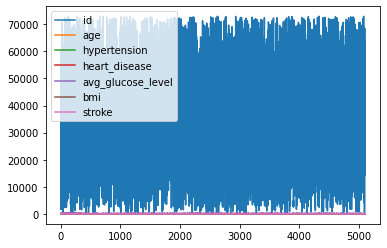

In [ ]:
ndata.plot()

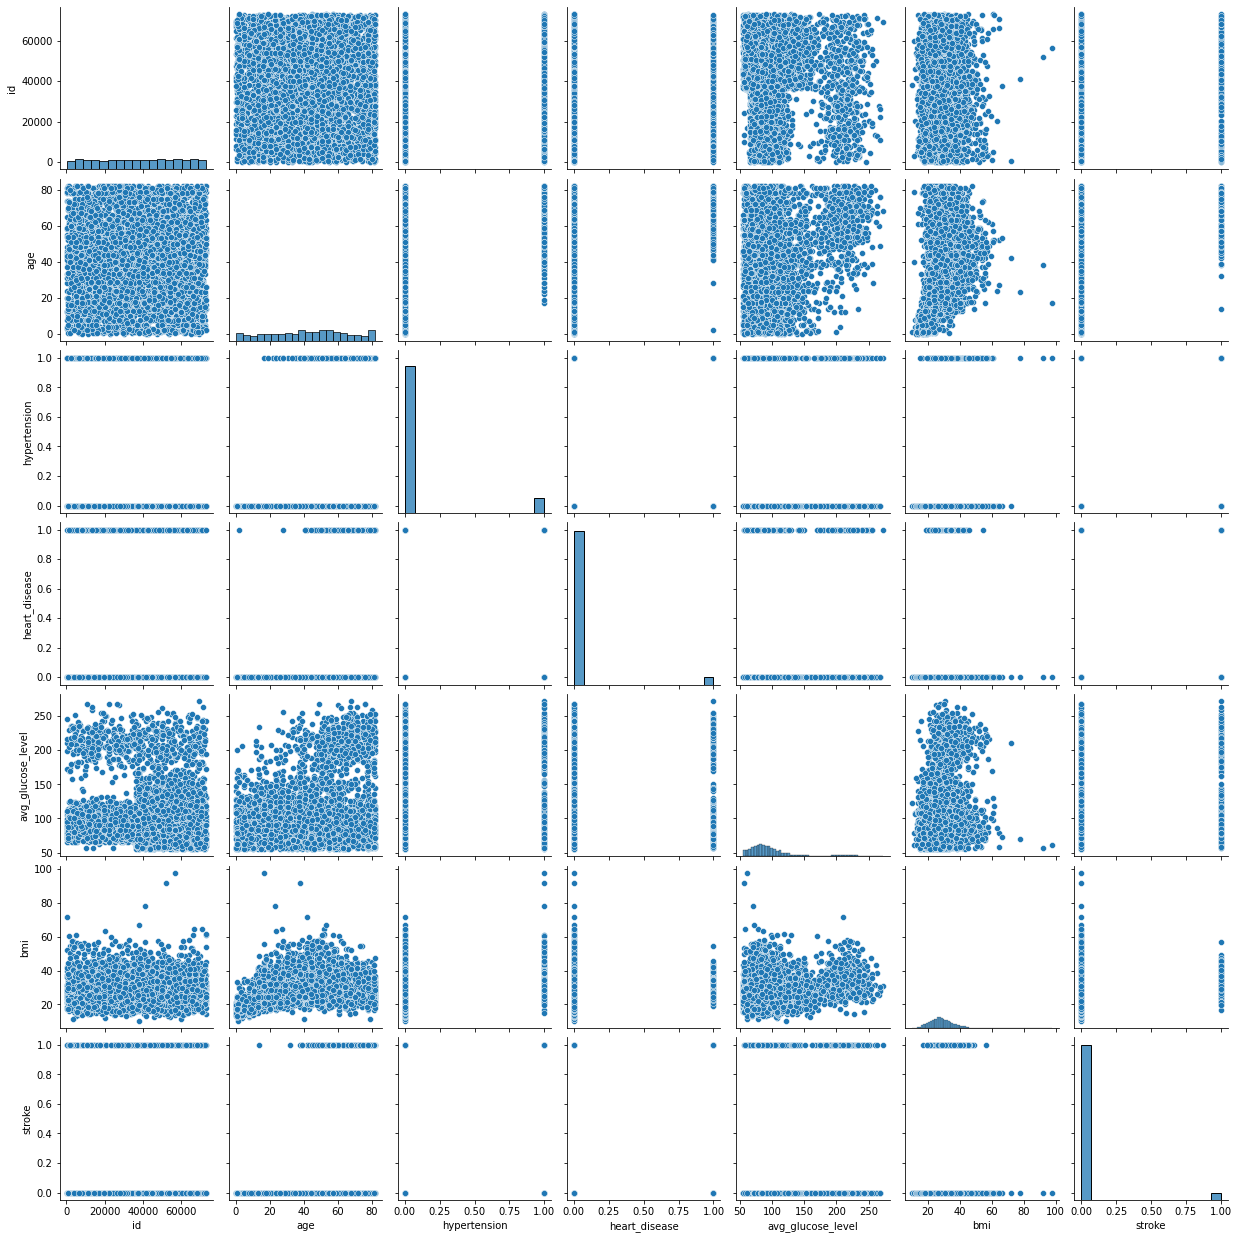

In [ ]:
sns.pairplot(ndata)

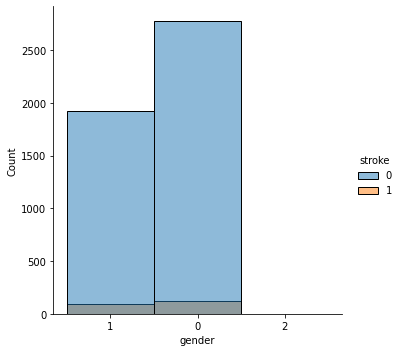

In [ ]:
sns.displot(ndata, x="gender", hue="stroke")

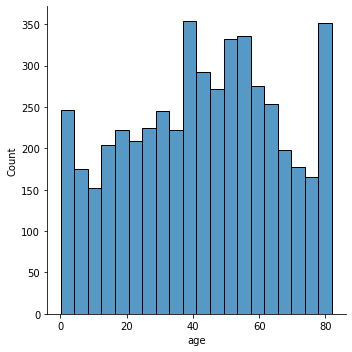

In [ ]:
sns.displot(ndata, x="age")

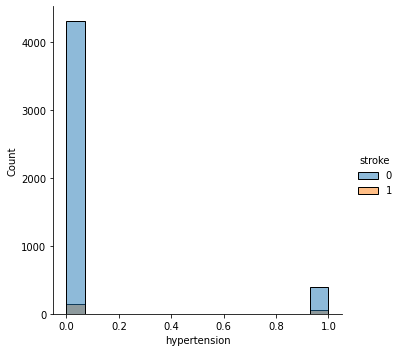

In [ ]:
sns.displot(ndata, x="hypertension", hue = "stroke" )

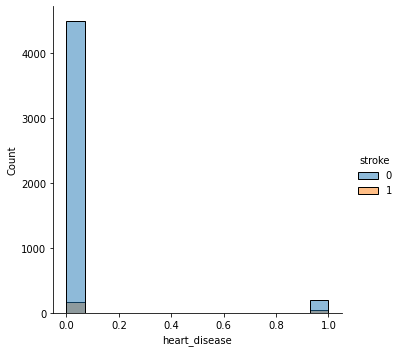

In [ ]:
sns.displot(ndata, x="heart_disease", hue = "stroke" )

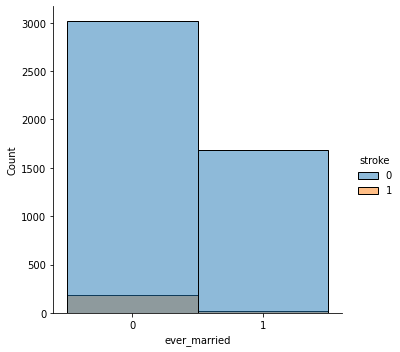

In [ ]:
sns.displot(ndata, x="ever_married", hue = "stroke" )

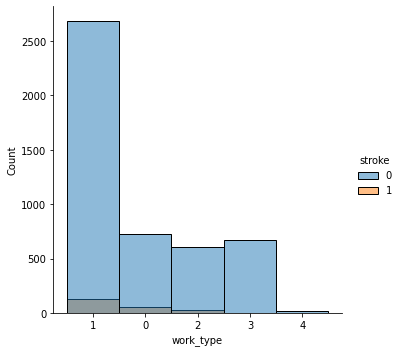

In [ ]:
sns.displot(ndata, x="work_type", hue = "stroke" )

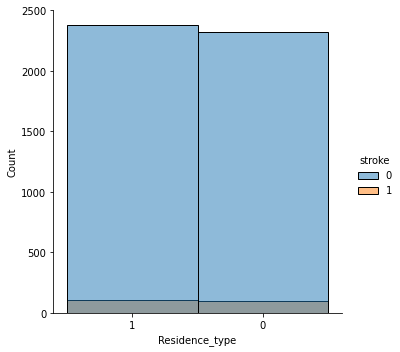

In [ ]:
sns.displot(ndata, x="Residence_type", hue = "stroke" )

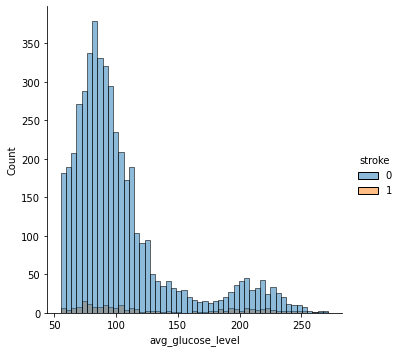

In [ ]:
sns.displot(ndata, x="avg_glucose_level", hue = "stroke" )

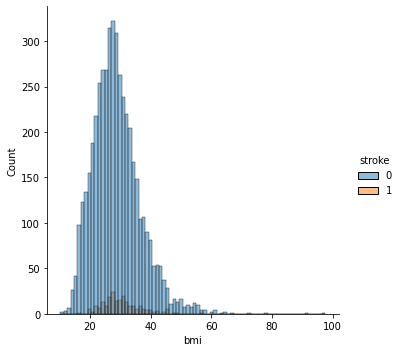

In [ ]:
sns.displot(ndata, x="bmi", hue = "stroke" )

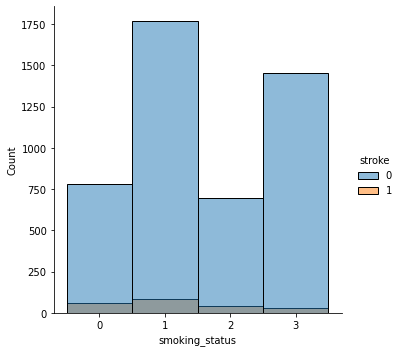

In [ ]:
sns.displot(ndata, x="smoking_status", hue = "stroke" )

In [ ]:
#importing libraries for machine learning model
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#creating features and target variable 
X = ndata[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',]].values
y = ndata ['stroke'].values

In [ ]:
#splitting the data into train and test data for random forest classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#fitting the train/test split data into random forest
rfc = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 42)
rfc_model = rfc.fit(X_train, y_train)
rfc_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#evaluating random forest prediction on the training data
y_train_pred = rfc .predict(X_train)
rfc.score(X_train, y_train)

1.0

In [ ]:
#evaluating random forest prediction on the test data
y_test_pred = rfc.predict(X_test)
rfc.score(X_test,y_test)

0.945010183299389